## Домашнее задание 3
### Линейные модели
---


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

#### Задание 1 (Теоретическое)
На лекции было сказано, что большие по модулю веса могут сигнализировать о наличии переобучения или о наличии линейной зависимости между признаками. В этом задании вам предстоит показать, что при отсутствии регуляризации (штрафа за большие веса) коэффициенты перед зависимыми признаками могут расти неограниченно.

Рассмотрим данные, в которых истинная зависимость целевой переменной $y$ от признака $x$ описывается коэффициентом w (то есть истинная зависимость выглядит как $y = wx + ...$, где ... - другие признаки НЕ ЗАВИСЯЩИЕ от x). Искусственно добавим в модель зависимый признак равный -x. 
После обучения модели получим зависимость $y = w_1x + w_2 (-x) + ...$.

Покажите, что веса $w_1$ и $w_2$ могут быть сколь угодно большими.

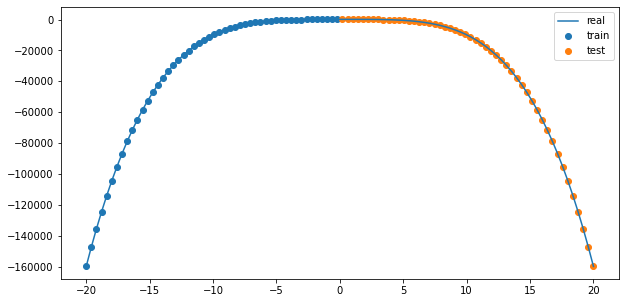

In [8]:
X = np.linspace(-20, 20, 100)
y = -1 * X**4  + 100

X_train = X[:50].reshape(-1, 1)
y_train = y[:50] + np.random.randn(50) * 10

X_test = X[50:].reshape(-1, 1)
y_test = y[50:] + np.random.randn(50) * 10

plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

In [9]:
class MyLinearRegression:
    def __init__(self):
        self.w = None
        pass
    
    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!
        a = np.ones(len(X))
        a = a[:, None]
        X = np.hstack((X, a))
        
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        # В эту переменную нужно сохранить результат:
        #np.dot(  A , B ) == A@B
        # len(self.w) = n_features + 1
        return self
        
        
    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        # Не забудьте про фиктивный признак равный 1!
        a = np.ones(len(X))
        a = a[:, None]
        X = np.hstack((X, a))
        
        y_pred = X @ self.w # Результат предсказания
        return y_pred
    
    def get_weights(self):
        return self.w # тут тоже что-то нужно исправить 

In [10]:
regressor = MyLinearRegression()
regressor.fit(X_train , y_train)
w = regressor.get_weights()

print(w)

[ 6593.73312285 33401.06232611]


#### Задание 2

Линейная регрессия с L2-регуляризацией или Ridge регрессия состоит в минимизации следующего функционала:
$$||Y - Xw||^2 + \lambda ||w||^2 \rightarrow min$$

Для данной задачи можно выписать явное решение:
$$w = (X^TX + \lambda I)^{-1}X^TY$$

Реализуйте свой класс для гребневой регрессии, воспользовавшись формулой выше.

In [11]:
class MyRidgeRegression:
    
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def fit(self, X_train, y_train):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!
        # Не применяйте регуляризацию к параметру b
        # (это означает, что \lambda I не просто диагональная матрица, 
        #  а диагональ с одним нулем, соотвеетствующим признаку-константе)
        
        ones = np.ones(len(X_train))
        X_train = np.array(X_train)
        X_train = np.column_stack((np.ones(len(X_train)), X_train))
        y_train = np.array(y_train)
        self.beta = np.linalg.inv(np.transpose(X_train).dot(X_train)+self.alpha*np.identity(X_train.shape[1])).dot(np.transpose(X_train)).dot(y_train)
  
        # Коэффициент лямбда сохранен в переменной self.alpha
        # Вам может понадобиться функция np.eye
        
    def predict(self, X_test):
        # Принимает на вход X и возвращает ответы модели
        
        ones = np.ones(len(X_test))
        X_test = np.array(X_test)
        X_test = np.column_stack((np.ones(len(X_test)), X_test))
        return X_test.dot(self.beta)
        return y_pred
    
    def get_weights(self):
        return self.w

Протестируем наш алгоритм на искусственных данных и сравним с линейной регрессией без регуляризации

In [12]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [16]:
linear_regr = LinearRegression()
ridge_regr = MyRidgeRegression(alpha=0.1)

linear_regr.fit(X_train, y_train)
ridge_regr.fit(X_train, y_train)

linear_regr_predictions = linear_regr.predict(X_test)
ridge_regr_predictions = ridge_regr.predict(X_test)

В качестве метрики качества воспользуемся MAE (средняя абсолютная ошибка)

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
print('Linear regression: ', mean_absolute_error(y_test, linear_regr_predictions))

Linear regression:  118.90393118774058


In [19]:
print('Ridge regression: ', mean_absolute_error(y_test, ridge_regr_predictions))

Ridge regression:  118.86019900538247


Попробуйте подобрать такой коэффициент регуляризации, чтобы ошибка на тесте была меньше, чем у модели без регуляризации.

#### Задание 3
В этом задании предлагается поиграться с различными ядрами SVM и подобрать лучшие параметры для каждого из них

Вам дан датасет (находится в файле banknote.data), в котором представлены различные статистики подсчитанные для изображения купюр. Задача состоит в классификации купюр на подлинные и фальшивые на основе этих данных.
(Подробнее https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


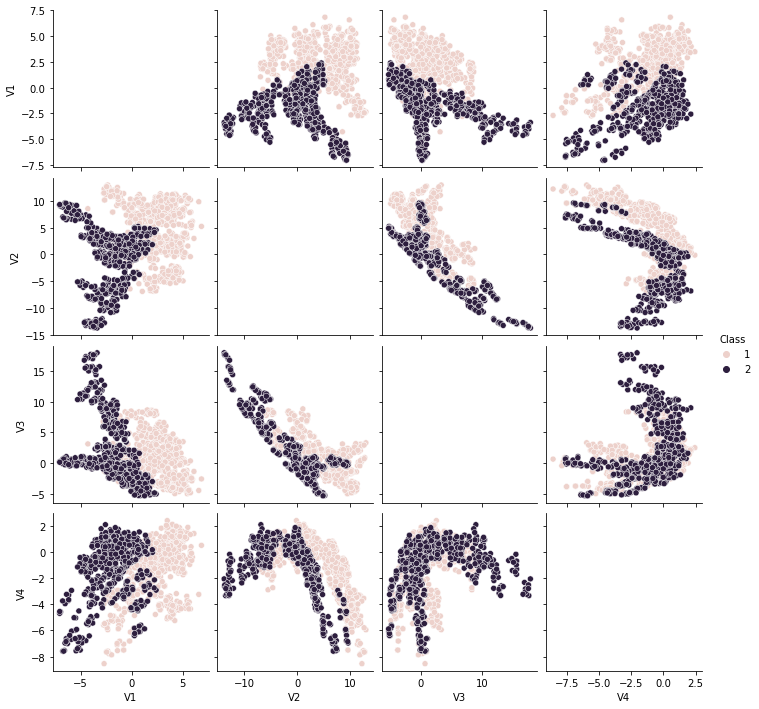

In [20]:
import seaborn as sns

# data = pd.read_csv('banknote.data', sep=',', header=-1)
data = pd.read_csv('https://datahub.io/machine-learning/banknote-authentication/r/banknote-authentication.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# одновременно нарисовать график и цветной и с распределениями не получается (особенность датасета)
sns.pairplot(data, diag_kind='', hue='Class')
# sns.pairplot(data, diag_kind='kde')

data.head()

Разделите выборку на трейн и тест в соотношении 1:1

In [21]:
# ВАШ КОД ЗДЕСЬ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [22]:
from sklearn.svm import SVC

Для каждого из ядер svc (параметр kernel='linear', 'poly', 'rbf') подберите хороший набор параметров с помощью GridSearchCV, который максимизирует метрику F1-score на тесте. 

НАПОМИНАНИЕ: $ F1 = 2\frac{precision \cdot recall}{precision + recall} $

ПОДСКАЗКА: параметр C в SVC отвечает за коэффициент регуляризации, degree - степень полинома в полиномиальном ядре, gamma - коэффициент в экспоненте у гауссовского ядра. Про другие парамеры (если понадобятся) предлагается прочитать самостоятельно.

In [23]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [62]:
parametrs = {'C': list(range(1, 10)), 'degree': list(range(1, 10))}

In [65]:
gs_clf = SVC(kernel = 'linear')

In [66]:
grid_searcher = GridSearchCV(gs_clf, cv=5, n_jobs = -1, verbose = 5, scoring='f1', param_grid=parametrs)

In [67]:
grid_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1', verbose=5)

In [68]:
clf = grid_searcher.best_estimator_

In [40]:
kernel_rbf = grid_searcher.best_params_

In [41]:
kernel_rbf

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [49]:
kernel_poly = grid_searcher.best_params_

In [50]:
kernel_poly

{'C': 6, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

In [69]:
kernel_linear = grid_searcher.best_params_

In [70]:
kernel_linear

{'C': 6, 'degree': 1}

______________

## Просто интересеные картинки

Предлагаю немного расслабиться и посмотреть как делается полиномиальная регрессия (добавление степенных признаков в модель) и как Lasso проводит отбор признаков.

<ipython-input-71-bda601239939>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlabel('x')
<ipython-input-71-bda601239939>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('y')


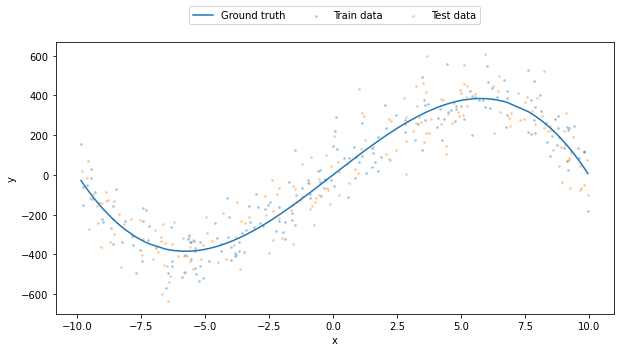

In [71]:
# Data generation

def gen_batch(n, w, beta):
    d = len(w)
    X = np.random.uniform(-10, 10, (n, 1))
    X = np.sort(X, axis=0)
    X = np.hstack([X ** i for i in range(d)])
    t = X.dot(w) + np.random.normal(size=n) / beta ** 0.5
    return X, t

n = 200
d = 21
w_true = np.zeros(d)
w_true[1] = 100
w_true[3] = -1
beta_true = 1e-4

X_train, t_train = gen_batch(n, w_true, beta_true)
X_test, t_test = gen_batch(n, w_true, beta_true)

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 1], t_train, s=3, label='Train data', alpha=0.3)
plt.scatter(X_test[:, 1], t_test, s=3, label='Test data', alpha=0.3)
plt.plot(X_train[:, 1], X_train.dot(w_true), label='Ground truth')

plt.axes().set_xlabel('x')
plt.axes().set_ylabel('y')
plt.legend(ncol=3, loc=9, bbox_to_anchor=(0.5, 1.15))
plt.show()

In [72]:
# Ridge Regression with Cross-Validation
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=20, alphas=10.**np.arange(-6, 3, 1),
                fit_intercept=False)
ridge.fit(X_train, t_train)
w_ridge = ridge.coef_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51019e-40): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33733e-40): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32746e-40): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36427e-40): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38435e-40): result may not be accurate

In [73]:
# Lasso Regression with Cross-Validation
from sklearn.linear_model import LassoCV, Lasso
lasso = LassoCV(cv=20, alphas=10.**np.arange(-6, 3, 1),
                fit_intercept=False)
lasso.fit(X_train, t_train)
w_lasso = lasso.coef_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1492188.114211544, tolerance: 1646.1430962662498
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970981.6799477523, tolerance: 1646.1430962662498
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 845680.2718232818, tolerance: 1646.1430962662498
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526:

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795744.7786994386, tolerance: 1565.589423787445
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 793326.1777201212, tolerance: 1565.589423787445
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791916.0406255584, tolerance: 1565.589423787445
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: Co

Ridge Regression
Features remaining: 21 / 21
Train error: 8103.408542973022
Test error:  12166.702323920035
--------------------------------------------------
Lasso Regression
Features remaining: 18 / 21
Train error: 8497.268278335167
Test error:  11509.63650370942


<ipython-input-74-fb3ad066a898>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlabel('x')
<ipython-input-74-fb3ad066a898>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('y')


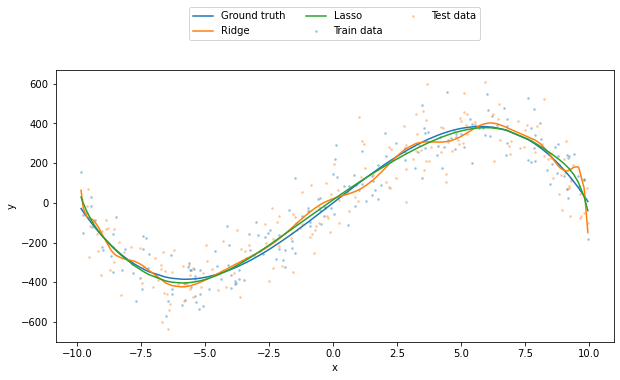

In [74]:
def l2_error(X, t, w):
    return np.sum((X.dot(w.ravel()) - t) ** 2)

# Comparison
print('Ridge Regression')
print('Features remaining:', np.sum(np.abs(w_ridge) > 1e-15), '/', d)
print('Train error:', l2_error(X_train, t_train, w_ridge) / n)
print('Test error: ', l2_error(X_test, t_test, w_ridge) / n)
print('-'*50)
print('Lasso Regression')
print('Features remaining:', np.sum(np.abs(w_lasso) > 1e-15), '/', d)
print('Train error:', l2_error(X_train, t_train, w_lasso) / n)
print('Test error: ', l2_error(X_test, t_test, w_lasso) / n)

plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 1], t_train, s=3, label='Train data', alpha=0.3)
plt.scatter(X_test[:, 1], t_test, s=3, label='Test data', alpha=0.3)
plt.plot(X_train[:, 1], X_train.dot(w_true), label='Ground truth')
plt.plot(X_train[:, 1], X_train.dot(w_ridge), label='Ridge')
plt.plot(X_train[:, 1], X_train.dot(w_lasso), label='Lasso')

plt.axes().set_xlabel('x')
plt.axes().set_ylabel('y')
plt.legend(ncol=3, loc=9, bbox_to_anchor=(0.5, 1.25))
plt.show()